# Варіант 9

$$
    \begin{equation}
        \begin{cases}
            8.1 * x_1 + 8.5 * x_2 = 72\\
            -3.2 * x_1 + 15.2 * x_2 = 42\\
            10.2 * x_1 + 8.8 * x_2 = 205
        \end{cases}
    \end{equation}
$$

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
A = np.array([
    [8.1, 8.5],
    [-3.2, 15.2],
    [10.2, 8.8]
])

B = np.array([72, 42, 205])

def get_x2_by_x1(idx, x1):
    return (B[idx] - A[idx, 0] * x1) / A[idx, 1]

In [3]:
colors = ['#8A4BCD', '#FFD700', '#2E8B57']
styles = ['-', '-.', ':']
descriptions = ['$8.1 * x_1 + 8.5 * x_2 = 72$', '$-3.2 * x_1 + 15.2 * x_2 = 42$', '$10.2 * x_1 + 8.8 * x_2 = 205$']
labels = ['f[0]', 'f[1]', 'f[2]']

### Завдання 1
Побудувати кожну лінію на окремому графіку, розмістивши їх поруч:
- всі прямі повинні бути різного кольору, але використовувати системну послідовність кольорів (синій, помаранчевий, зелени...);
- всі прямі повинні мати різний тип ліній (пунктирна, точка тире ощо);
- всі графіки повинні мати сумісну вісь;
- кожен графік повинен мати підпис. ординат.динат

In [4]:
def task_1():
    x_1 = np.linspace(0, 10, 5)

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13, 5))

    fig.suptitle('The example', fontsize=20)
    
    for i, ax in enumerate(axes):
        x_2 = get_x2_by_x1(i, x_1)
        
        ax.plot(x_1, x_2, color=colors[i], linestyle=styles[i])
        ax.set_title(descriptions[i])
        ax.set_xlabel('$x_1$')
        ax.set_ylabel('$x_2$')

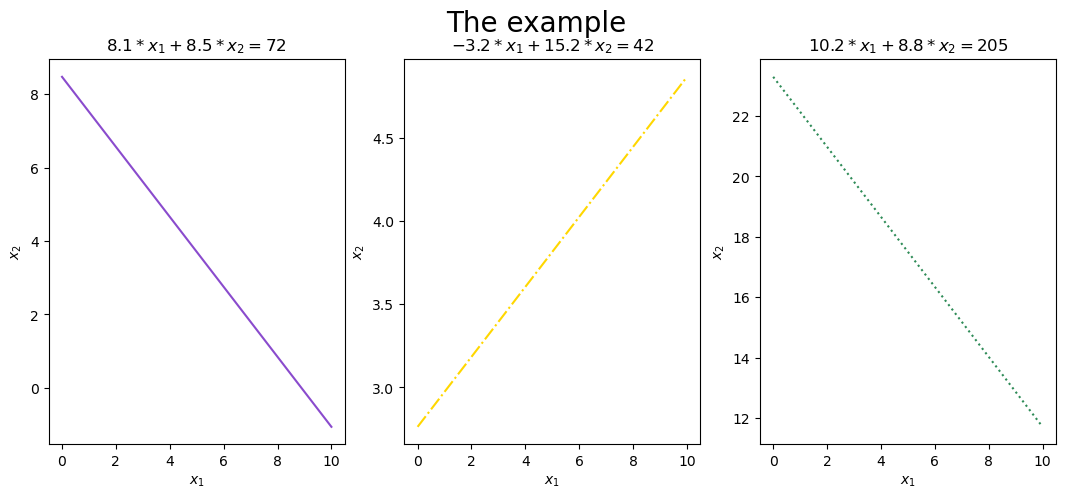

In [5]:
task_1()

### Завдання 2
Розмістити всі лінії на одному рисунку. 
- всі прямі повинні бути різного кольору, але не використовувати системну послідовність кольорів (синій, помаранчевий, зелений...);
- всі прямі повинні мати різний тип ліній (пунктирна, точка тире тощо); 
- підібрати масштаб таким чином, щоб всі три точки перетину прямих були в області видимості;
- додати легенду на графік;
- додати сітку, в якій задати колір та тип ліній;
- змінити розмір рисунку (наприклад, 8×16 дюймів) та розподільчу здатність (наприклад, 100 dpi);
- зробити підписи рівнянь прямих вздовж лінії з відповідним нахилом;
- додати підписи осей та назву графіку;
- заповнити кольором область, що утворена перетином всіх прямих (використовуйте метод fill_between). 

За допомогою підмодуля питmpy. linalg знайти точки перетину всіх пар прямих, відмітити їх та зробити відповідні вказівки на графіку.

In [6]:
def min_x2(x_1):
    return np.minimum(get_x2_by_x1(1, x_1), get_x2_by_x1(2, x_1))


def task_2():
    x_1 = np.linspace(-20, 80, 500)

    fig, ax = plt.subplots(figsize=(10, 10), dpi=120)

    fig.suptitle('All lines in one figure', fontsize=20)
    
    ax.grid(color='#0a0a0a', linestyle='-', linewidth=0.2)
    ax.set_xlabel('$x_1$', fontsize=16)
    ax.set_ylabel('$x_2$', fontsize=16)

    y_0 = get_x2_by_x1(0, x_1)
    ax.plot(x_1, y_0, color=colors[0], linestyle=styles[0], linewidth=3, label=labels[0])
    y_1 = get_x2_by_x1(1, x_1)
    ax.plot(x_1, y_1, color=colors[1], linestyle=styles[1], linewidth=3, label=labels[1])
    y_2 = get_x2_by_x1(2, x_1)
    ax.plot(x_1, y_2, color=colors[2], linestyle=styles[2], linewidth=3, label=labels[2])

    plt.text(-20, 23, descriptions[0], fontsize=10, rotation=np.arctan(get_x2_by_x1(0, 1) - get_x2_by_x1(0, 0)) * 180 / math.pi, rotation_mode='anchor', transform_rotates_text=True)
    plt.text(40, 17, descriptions[1], fontsize=10, rotation=np.arctan(get_x2_by_x1(1, 1) - get_x2_by_x1(1, 0)) * 180 / math.pi, rotation_mode='anchor', transform_rotates_text=True)
    plt.text(-20, 50, descriptions[2], fontsize=10, rotation=np.arctan(get_x2_by_x1(2, 1) - get_x2_by_x1(2, 0)) * 180 / math.pi, rotation_mode='anchor', transform_rotates_text=True)

    ax.legend()

    sols = []
    for i in range(A.shape[0]):
        sol = np.linalg.solve(np.delete(A, i, 0), np.delete(B, i, 0))
        ax.scatter(sol[0], sol[1])
        sols.append(sol)
    ax.annotate("Точка перетину f[1] і f[2]", (sols[0][0], sols[0][1]), fontsize=16)
    ax.annotate("Точка перетину f[0] і f[2]", (sols[1][0], sols[1][1]), fontsize=16)
    ax.annotate("Точка перетину f[0] і f[1]", (sols[2][0], sols[2][1]), fontsize=16)

    ax.fill_between(x_1, y_0, min_x2(x_1), color='grey', alpha=0.5, where=(y_0 < min_x2(x_1)))

    plt.show()

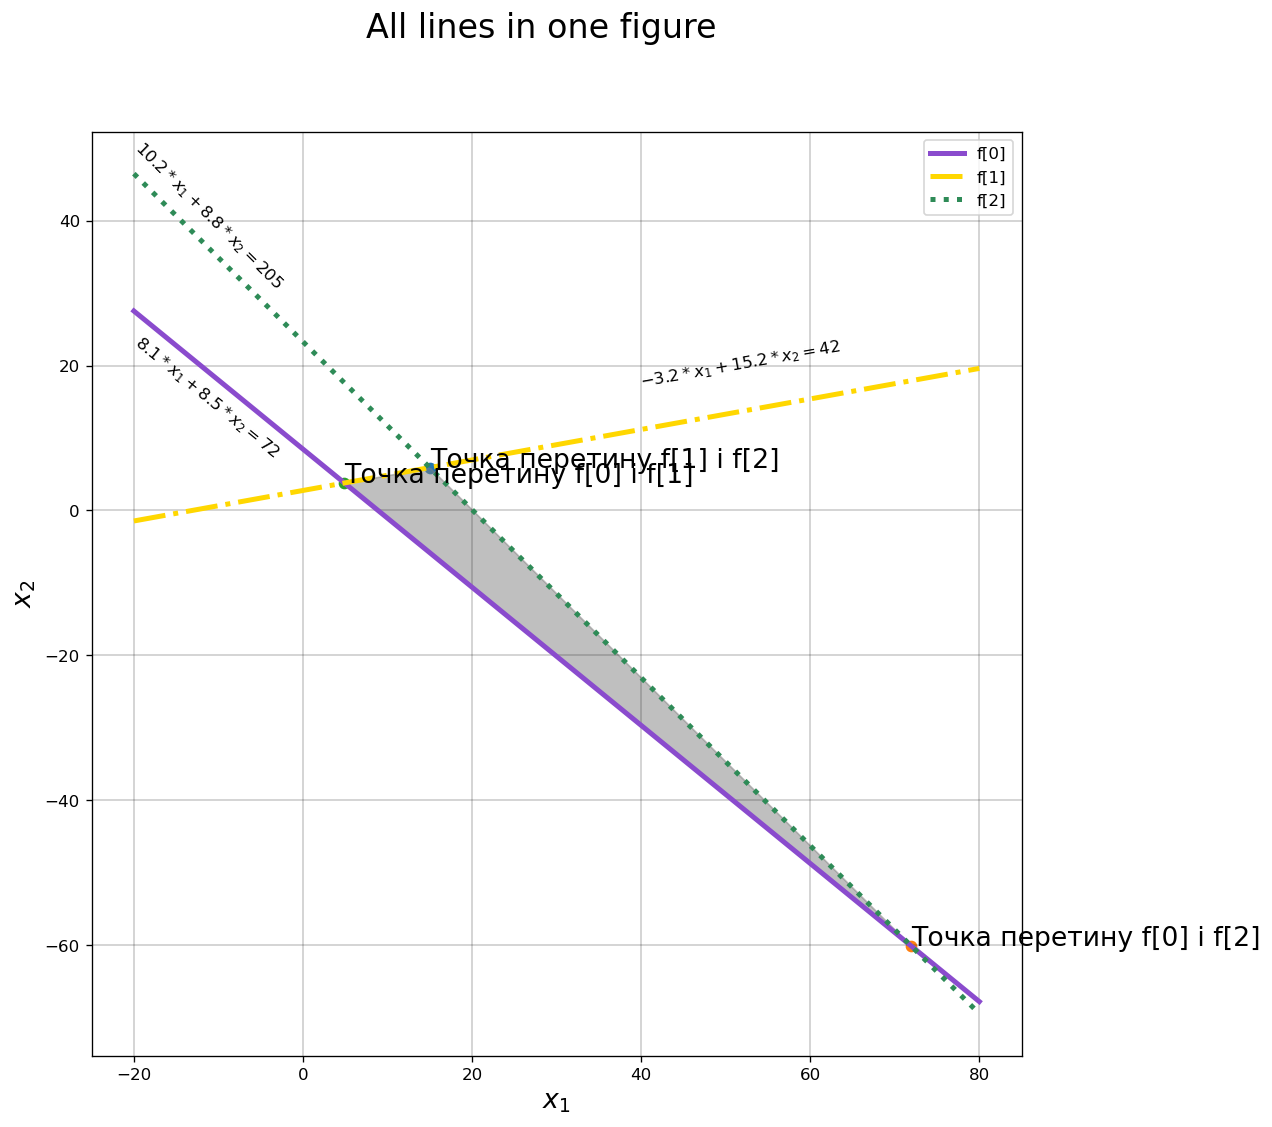

In [7]:
task_2()